# Aprendizado de máquina e exercícios de NLP #

## Exercicio ##

Usaremos o conjunto de dados de revisão do Kaggle  para este exercício. O produto que focaremos neste momento é uma xícara de cappuccino. O objetivo desta semana é não apenas pré-processar os dados, mas classificar as revisões como positivas ou negativas com base no texto da revisão.

O código a seguir ajudará você a carregar os dados.

In [1]:
!pip install nltk

In [2]:
import nltk
import pandas as pd

In [3]:
data = pd.read_csv('coffee.csv')
data.head()

,user_id,stars,reviews
0,A2XP9IN4JOMROD,1,I wanted to love this. I was even prepared for...
1,A2TS09JCXNV1VD,5,Grove Square Cappuccino Cups were excellent. T...
2,AJ3L5J7GN09SV,2,I bought the Grove Square hazelnut cappuccino ...
3,A3CZD34ZTUJME7,1,"I love my Keurig, and I love most of the Keuri..."
4,AWKN396SHAQGP,1,It's a powdered drink. No filter in k-cup.<br ...


## Desafio 1 ##

* Determine quantas revisões existem no total.
* Determine o percentual de 1, 2, 3, 4 e 5 estrelas.
* Crie um novo conjunto de dados para modelagem com as seguintes colunas:
      - Coluna 1: 'positivo' se revisão = 4 ou 5 e 'negativo' se revisão = 1 ou 2
      - Coluna 2: texto de revisão
* Veja o número de análises positivas e negativas no conjunto de dados recém-criado.

Ponto de verificação: o conjunto de dados resultante deve ter 514 revisões.

Use o código de pré-processamento abaixo para limpar os dados das revisões antes de passar para a modelagem.

In [ ]:
# Essa é com voces turma :)

In [ ]:
# Enquanto a maioria dos revisores deixa uma avaliação de 5 estrelas, também há uma boa parte deixando avaliações de 1 estrela
data.stars.value_counts(normalize=True)

5    0.568266
1    0.177122
4    0.119926
2    0.083026
3    0.051661
Name: stars, dtype: float64

In [ ]:
import numpy as np

# Remover comentários de 3 estrelas
data = data[data.stars!=3]

# Defina 4/5 estrelas como positivas, o resto como negativo
data['sentiment'] = np.where(data['stars'] >= 4, 'positive', 'negative')

# Incluir apenas as colunas de opinião e comentários
data = data[['sentiment', 'reviews']]
data.head()

,sentiment,reviews
0,negative,I wanted to love this. I was even prepared for...
1,positive,Grove Square Cappuccino Cups were excellent. T...
2,negative,I bought the Grove Square hazelnut cappuccino ...
3,negative,"I love my Keurig, and I love most of the Keuri..."
4,negative,It's a powdered drink. No filter in k-cup.<br ...


In [ ]:
# Check the length of the new dataset
len(data)

514

In [ ]:
# Verifique o comprimento do novo conjunto de dados
data.sentiment.value_counts(normalize=True)

positive    0.725681
negative    0.274319
Name: sentiment, dtype: float64

In [ ]:
# Etapas de pré-processamento de texto - remova números, letras maiúsculas e pontuação
import re
import string

alphanumeric = lambda x: re.sub(r"""\w*\d\w*""", ' ', x)
punc_lower = lambda x: re.sub('[%s]' % re.escape(string.punctuation), ' ', x.lower())

data['reviews'] = data.reviews.map(alphanumeric).map(punc_lower)
data.head()

,sentiment,reviews
0,negative,i wanted to love this i was even prepared for...
1,positive,grove square cappuccino cups were excellent t...
2,negative,i bought the grove square hazelnut cappuccino ...
3,negative,i love my keurig and i love most of the keuri...
4,negative,it s a powdered drink no filter in k cup br ...


## Desafio 2 ##

Prepare os dados para modelagem:
* Divida os dados em conjuntos de treinamento e teste. Você deve ter quatro conjuntos de dados - X_train, X_test, y_train, y_test

Crie recursos numéricos com o Count Vectorizer. Crie duas matrizes de termo do documento:
* Matriz 1: os termos devem ser unigramas (palavras únicas) e os valores devem ser contados por palavras (dica: esse é o padrão do vetor de contagem)
* Matriz 2: os termos devem ser unigramas e bigrams e os valores devem ser valores binários

Recomendação: Utilize a função de palavras de parada do Count Vectorizer para remover palavras de parada do texto das revisões.

In [ ]:
# Divida os dados em conjuntos de dados X e y
X = data.reviews
y = data.sentiment

In [ ]:
# Divida os dados em conjuntos de treinamento e teste
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Número de revisões no conjunto de treinamento
X_train.shape, y_train.shape

((359,), (359,))

In [ ]:
# Número de revisões no conjunto de testes
X_test.shape, y_test.shape

((155,), (155,))

In [ ]:
# A primeira matriz de termo de documento possui valores padrão de vetor de contagem - contagem de unigramas
from sklearn.feature_extraction.text import CountVectorizer

cv1 = CountVectorizer(stop_words='english')

X_train_cv1 = cv1.fit_transform(X_train)
X_test_cv1  = cv1.transform(X_test)

print(X_train_cv1.toarray().shape)

(359, 1638)


In [ ]:
# A segunda matriz de termos de documento possui unigramas e bigrams e indicadores em vez de contagens
cv2 = CountVectorizer(ngram_range=(1,2), binary=True, stop_words='english')

X_train_cv2 = cv2.fit_transform(X_train)
X_test_cv2  = cv2.transform(X_test)

print(X_train_cv2.toarray().shape)

(359, 7792)


## Desafio 3 ##

Use a regressão logística para classificar as críticas como positivas ou negativas. Faça isso para ambas as matrizes.
* Ajuste um modelo de regressão logística nos dados de treinamento
* Aplique o modelo nos dados de teste e calcule as seguintes métricas de erro: exatidão, precisão, recall, pontuação F1
* Opcional: visualize a matriz de confusão para os dois modelos
* Compare as métricas de erro das duas matrizes

Recomendação: Crie uma função para calcular as métricas de erro, pois você fará isso várias vezes.

In [ ]:
# Crie um modelo de regressão logística para usar
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [ ]:
# Treine o primeiro modelo
lr.fit(X_train_cv1, y_train)
y_pred_cv1 = lr.predict(X_test_cv1)

In [ ]:
# Treine o segundo modelo
lr.fit(X_train_cv2, y_train)
y_pred_cv2 = lr.predict(X_test_cv2)

In [ ]:
# Crie uma função para calcular as métricas de erro, pois faremos isso várias vezes
from __future__ import division
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['actual_negative', 'actual_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");

    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]
    
    a = true_pos + true_neg
    b = true_pos + true_neg + false_pos + false_neg
    print (a/b)
    
    accuracy = round(float((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg)),3)
    precision = round(float((true_pos) / (true_pos + false_pos)),3)
    recall = round(float((true_pos) / (true_pos + false_neg)),3)
    f1 = round(float(2 * (precision * recall) / (precision + recall)),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


0.8580645161290322


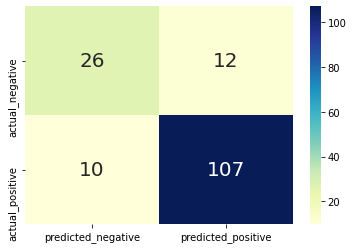

In [ ]:
# To mapa de calor para o primeiro modelo de regressão logística
cm1 = conf_matrix(y_test, y_pred_cv1)

0.864516129032258


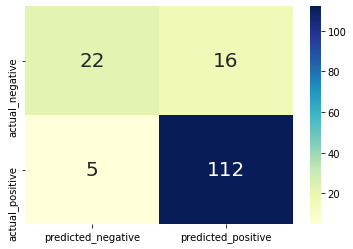

In [ ]:
# O mapa de calor para o segundo modelo de regressão logística
cm2 = conf_matrix(y_test, y_pred_cv2)

In [ ]:
# Compile todas as métricas de erro em um quadro de dados para comparação
results = pd.DataFrame(list(zip(cm1, cm2)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LogReg1', 'LogReg2']
results

,LogReg1,LogReg2
Accuracy,0.858,0.865
Precision,0.899,0.875
Recall,0.915,0.957
F1 Score,0.907,0.914


Comparando os dois modelos, o primeiro modelo tem melhor precisão, enquanto o segundo modelo tem melhor precisão e recall.

## Desafio 4 ##

tentamos usar outra técnica de aprendizado de máquina para classificar essas análises como positivas ou negativas. Siga exatamente o mesmo exercício na etapa anterior, mas desta vez use Naive Bayes em vez de Regressão logística.

Para dados de contagem, use[Multinomial Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html#sklearn.naive_bayes.MultinomialNB). Para dados binários, use [Bernoulli Naive Bayes](http://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.BernoulliNB.html#sklearn.naive_bayes.BernoulliNB).

Compare os resultados dos modelos Regressão Logística e Naive Bayes.

In [ ]:
# Ajuste o primeiro modelo Naive Bayes
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()
mnb.fit(X_train_cv1, y_train)

y_pred_cv1_nb = mnb.predict(X_test_cv1)

In [ ]:
# Ajuste o segundo modelo Naive Bayes
from sklearn.naive_bayes import BernoulliNB

bnb = BernoulliNB()
bnb.fit(X_train_cv2, y_train)

y_pred_cv2_nb = bnb.predict(X_test_cv2)

0.8838709677419355


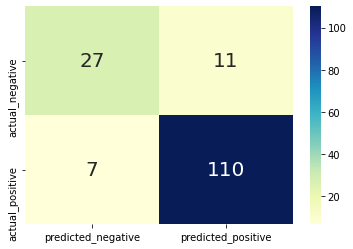

In [ ]:
# Aqui está o mapa de calor para o primeiro modelo Naive Bayes
cm3 = conf_matrix(y_test, y_pred_cv1_nb)

0.7612903225806451


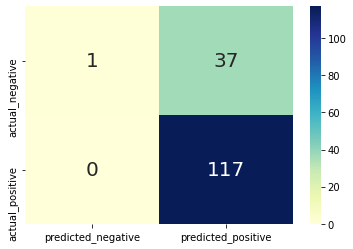

In [ ]:
# Aqui está o mapa de calor para o segundo modelo Naive Bayes
cm4 = conf_matrix(y_test, y_pred_cv2_nb)

In [ ]:
# Compile todas as métricas de erro em um quadro de dados para comparação
results_nb = pd.DataFrame(list(zip(cm3, cm4)))
results_nb = results_nb.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results_nb.columns = ['NB1', 'NB2']
results_nb

results = pd.concat([results, results_nb], axis=1)
results

,LogReg1,LogReg2,NB1,NB2
Accuracy,0.858,0.865,0.884,0.761
Precision,0.899,0.875,0.909,0.760
Recall,0.915,0.957,0.940,1.000
F1 Score,0.907,0.914,0.924,0.864


O primeiro modelo Naive Bayes supera os dois modelos de regressão logística.

## Desafio 5 ##

Até o momento, usamos o Count Vectorizer para criar matrizes de termos de documentos para inserir nos modelos. Para pelo menos um dos quatro modelos que você criou até agora, use o TF-IDF Vectorizer em vez do Count Vectorizer e verifique se ele melhora os resultados.

De todos os modelos que você criou, qual modelo você acha que classifica melhor as críticas positivas e negativas para a xícara de cappuccino?

In [ ]:
# Crie versões TF-IDF dos vetorizadores de contagem criados anteriormente no exercício
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf1 = TfidfVectorizer(stop_words='english')
X_train_tfidf1 = tfidf1.fit_transform(X_train)
X_test_tfidf1  = tfidf1.transform(X_test)

tfidf2 = TfidfVectorizer(ngram_range=(1,2), binary=True, stop_words='english')
X_train_tfidf2 = tfidf2.fit_transform(X_train)
X_test_tfidf2  = tfidf2.transform(X_test)

0.8451612903225807


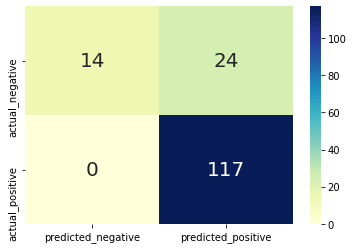

In [ ]:
# Ajuste a primeira regressão logística nos dados do TF-IDF
lr.fit(X_train_tfidf1, y_train)
y_pred_tfidf1_lr = lr.predict(X_test_tfidf1)
cm5 = conf_matrix(y_test, y_pred_tfidf1_lr)

0.7548387096774194


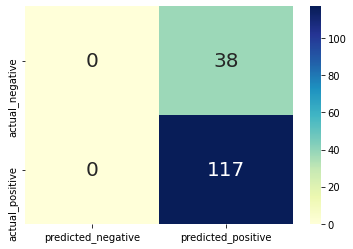

In [ ]:
# Ajuste a segunda regressão logística nos dados do TF-IDF
lr.fit(X_train_tfidf2, y_train)
y_pred_tfidf2_lr = lr.predict(X_test_tfidf2)
cm6 = conf_matrix(y_test, y_pred_tfidf2_lr)

Parece que usando TF-IDF, conseguimos melhorar o recall, mas a exatidão e a precisão do primeiro modelo Naive Bayes ainda supera os outros modelos.

No geral, o primeiro modelo Naive Bayes (usando unigramas e contagens) parece melhor classificar as avaliações positivas e negativas de xícara de cappuccino.